# Sistemas Inteligentes

## Laboratório 3 - Redução de Dimensionalidade e Regressão

Algoritmos de Redução de dimensionalidade:
- Principal Component Analysis (PCA)
- Independent Component Analysis (ICA)
- Isometric Mapping (Isomap)
- T-Distributed Stochastic Neighbor Embedding (TSNE)

Modelos de regressão linear:
- Least Squares
- Ridge
- Lasso
- Lasso Least-angle regression (LARS)
- RANdom SAmple Consensus (RANSAC)
- Theil-Sen

### Identificação do Aluno

#### Nome Completo

Lucas Eduardo De MIERI

#### RA

11201723007

## Importação e preparação dos dados

Importe o dataset de pacientes diabéticos da biblioteca Scikit (load_diabetes) e separe os dados entre atributos (X) e saídas (y).

In [149]:
from sklearn.datasets import load_diabetes
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
x=load_diabetes().data
y=load_diabetes().target

Mostre os formatos da variável de atributos e da variável de saídas.

In [3]:
x.shape

(442, 10)

In [4]:
y.shape

(442,)

## Redução de Dimensionalidade

Importe e aplique as funções de redução de dimensionalidade (PCA, FastICA, Isomap e TSNE) para reduzir a dimensionalidade a apenas uma feature.

In [5]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap, TSNE

Mostre o formato da nova variável de atributos após a redução de dimensionalidade para cada algoritmo.

In [6]:
pca=PCA(n_components=1)
pca.fit(x)
x_pca=pca.transform(x)
print(x_pca.shape)

#PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  #svd_solver='auto', tol=0.0, whiten=False)
#print(pca.explained_variance_ratio_) 

(442, 1)


In [7]:
fastica=FastICA(n_components=1)
fastica.fit(x)
x_FastICA=fastica.transform(x)
x_FastICA.shape

(442, 1)

In [8]:
isomap=Isomap(n_components=1)
isomap.fit(x)
x_isomap=isomap.transform(x)
x_isomap.shape

(442, 1)

In [162]:
tsne=TSNE(n_components=1)
tsne.fit(x)
x_tsne=tsne.fit_transform(x)
x_tsne.shape

(442, 1)

### Caso mais simples

Faça a separação dos dados para treinamento e teste. Reserve 20% dos dados para teste.

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_pca, y,test_size=0.2)

Importe o regressor linear e utilize-o para gerar um modelo, então faça uma regressão com os dados de teste.

In [10]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train)
print(reg.score(x_test, y_test))
reg_pred=reg.predict(x_test)

0.20692710211410126


Importe as funções de erro quadrático médio (MSE) e o coeficiente de determinação (R²), então imprima o MSE e o R².

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, reg_pred))
print(r2_score(y_test, reg_pred))

4542.290229959751
0.20692710211410126


Então exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada.

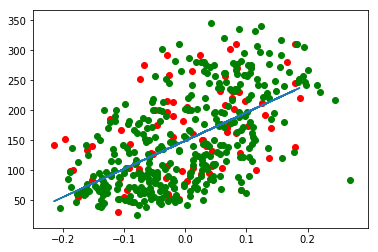

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_test, y_test, color='red')
plt.scatter(x_train, y_train, color='green')
plt.plot(x_test, reg_pred)

### Comparando Métodos de Redução de Dimensionalidade

Agora, a fim de comparar com outras técnicas, crie um método iterativo que realize as etapas de separação dos dados entre treinamento e teste, gere um modelo de regressão linear, faça a predição com base nos dados de testes e calcule o erro quadrático médio e o coeficiente de determinação para cada iteração. Então, calcule os valores mínimo, médio, máximo e desvio padrão para cada uma dessas duas métricas. Por fim, plote os histogramas (com 100 bins) das duas métricas. Use 10000 (dez mil) iterações.

#### PCA

In [144]:
mse=np.zeros(10000)
coef=np.zeros(10000)
for i in range(0, 10000):
    x_train, x_test, y_train, y_test= train_test_split(x_pca, y,test_size=0.2)
    reg=LinearRegression().fit(x_train,y_train)
    reg_pred=reg.predict(x_test)
    mse[i]=mean_squared_error(y_test, reg_pred)
    coef[i]=r2_score(y_test, reg_pred)
    


In [145]:
print("valor minimo", min(mse))
print("valor max", max(mse))
print("valor devpad", np.std(mse))
print("valor minimo", min(coef))
print("valor max", max(coef))
print("valor devpad", np.std(coef))


valor minimo 2449.282814174014
valor max 6057.718441395821
valor devpad 478.04307231839533
valor minimo -0.13553637383742867
valor max 0.49830893741697935
valor devpad 0.0717557212315946


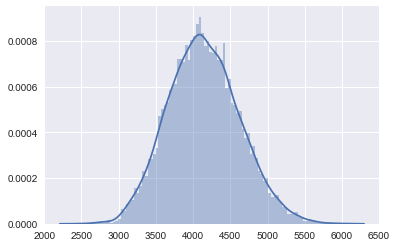

In [150]:
import seaborn as sns
sns.set()
sns.distplot(mse, bins=100)


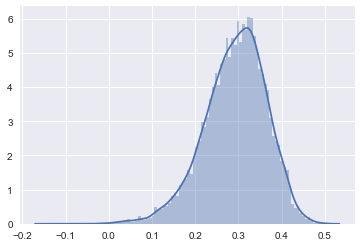

In [151]:
sns.distplot(coef, bins=100)

In [140]:
import pandas as pd
def all(mse, coef):
    print("valor minimo", min(mse))
    print("valor max", max(mse))
    print("valor devpad", np.std(mse))
    print("valor minimo", min(coef))
    print("valor max", max(coef))
    print("valor devpad", np.std(coef))

      
    fig, ax=plt.subplots(1, 2, figsize=(14, 5))
   
    sns.distplot(mse, bins=100,ax=ax[0])
    sns.distplot(coef, bins=100, ax=ax[1])
 

valor minimo 2449.282814174014
valor max 6057.718441395821
valor devpad 478.04307231839533
valor minimo -0.13553637383742867
valor max 0.49830893741697935
valor devpad 0.0717557212315946


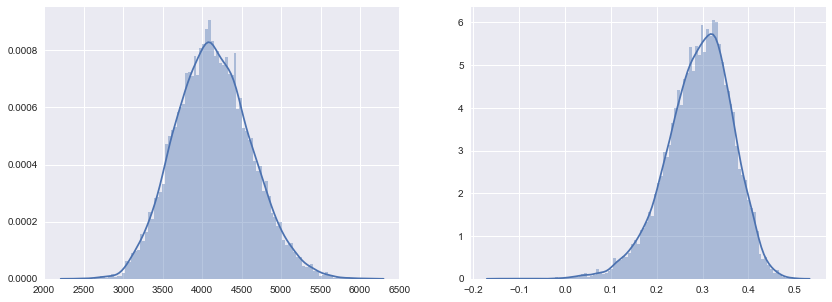

In [152]:
#teste da função

all(mse, coef)

#### ICA

valor minimo 2483.1297401587362
valor max 6125.567696261211
valor devpad 479.6732862758401
valor minimo -0.1319036643720073
valor max 0.5072337483879226
valor devpad 0.07184519910819451


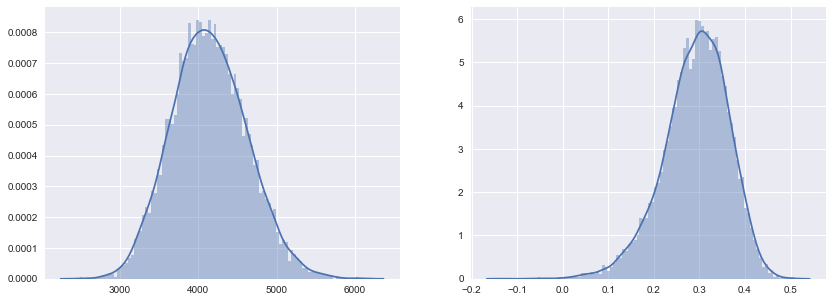

In [159]:
mse_ICA=np.zeros(10000)
coef_ICA=np.zeros(10000)
for i in range(0, 10000):
    x_train, x_test, y_train, y_test= train_test_split(x_FastICA, y,test_size=0.2)
    reg=LinearRegression().fit(x_train,y_train)
    reg_pred_ICA=reg.predict(x_test)
    y_pred_ICA=reg.predict(x_test)
    mse_ICA[i]=mean_squared_error(y_test, reg_pred_ICA)
    coef_ICA[i]=r2_score(y_test, reg_pred_ICA)

all(mse_ICA, coef_ICA)



#### Isomap

valor minimo 3526.5405188310137
valor max 7710.51581131872
valor devpad 578.1827924301325
valor minimo -0.2460639801135509
valor max 0.17190672842333965
valor devpad 0.04794978214810514


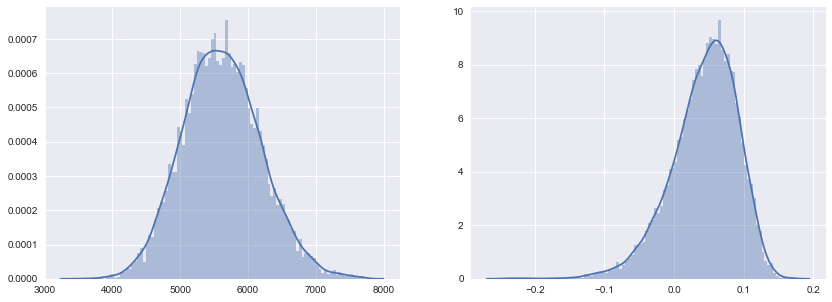

In [158]:
mse_isomap=np.zeros(10000)
coef_isomap=np.zeros(10000)
for i in range(0, 10000):
    x_train, x_test, y_train, y_test= train_test_split(x_isomap, y,test_size=0.2)
    reg=LinearRegression().fit(x_train,y_train)
    reg_pred_isomap=reg.predict(x_test)
    y_pred_isomap=reg.predict(x_test)
    mse_isomap[i]=mean_squared_error(y_test, reg_pred_isomap)
    coef_isomap[i]=r2_score(y_test, reg_pred_isomap)

all(mse_isomap, coef_isomap)

#### TSNE

valor minimo 3178.8635599860927
valor max 7192.561026618861
valor devpad 547.0707807080851
valor minimo -0.14034136822333654
valor max 0.34441499122602615
valor devpad 0.06561021864278686


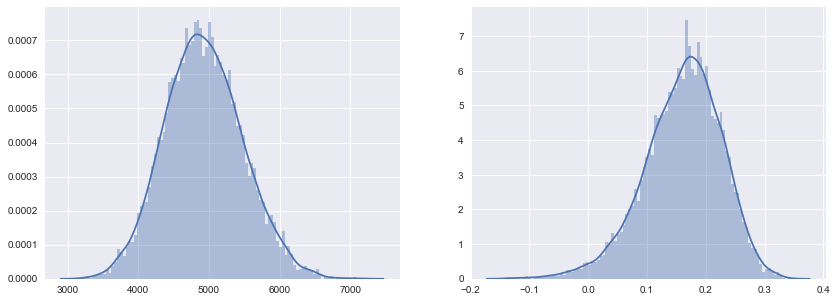

In [165]:
mse_tsne=np.zeros(10000)
coef_tsne=np.zeros(10000)
for i in range(0, 10000):
    x_train, x_test, y_train, y_test= train_test_split(x_tsne, y,test_size=0.2)
    reg=LinearRegression().fit(x_train,y_train)
    reg_pred_tsne=reg.predict(x_test)
    y_pred_tsne=reg.predict(x_test)
    mse_tsne[i]=mean_squared_error(y_test, reg_pred_tsne)
    coef_tsne[i]=r2_score(y_test, reg_pred_tsne)

all(mse_tsne, coef_tsne)

### Comparando modelos de Regressão

Exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada em cada caso.

In [183]:
def all (x, y, reg_test, reg_pred):

    plt.scatter(x, y)
    plt.plot(reg_test, reg_pred)

#### Least Squares

In [238]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20)
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_pca = x_test
reg_pred_pca = y_pred
LS_test_pca = x_test
LS_pred_pca = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_FastICA,y, test_size=0.20)
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_ica = x_test
reg_pred_ica = y_pred
LS_test_ica = x_test
LS_pred_ica = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_isomap, y, test_size=0.20)
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_iso = x_test
reg_pred_iso = y_pred
LS_test_iso = x_test
LS_pred_iso = y_pred


x_train, x_test, y_train, y_test = train_test_split(x_tsne, y, test_size=0.20)
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_tsne = x_test
reg_pred_tsne = y_pred
LS_test_tsne = x_test
LS_pred_tsne = y_pred

ICA


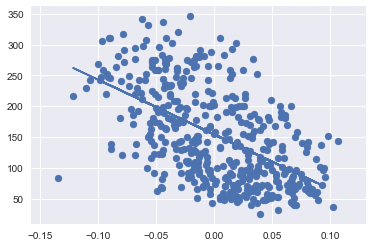

In [195]:
print("ICA")
all(x_FastICA, y, reg_test_ica, reg_pred_ica)


pca


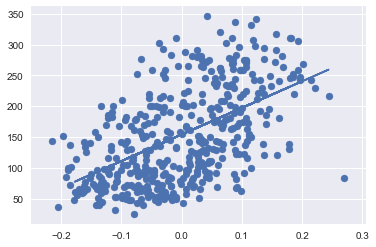

In [184]:
print("pca")
all(x_pca, y, reg_test_pca, reg_pred_pca)

tsne


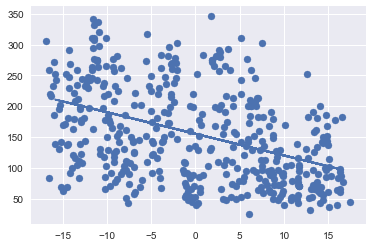

In [192]:
print("tsne")
all(x_tsne, y, reg_test_tsne, reg_pred_tsne)

isomap


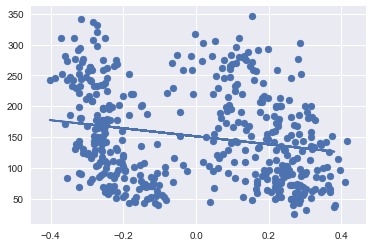

In [191]:
print("isomap")
all(x_isomap, y, reg_test_iso, reg_pred_iso)

#### Ridge

In [233]:
from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20)
reg = Ridge()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_pca = x_test
reg_pred_pca = y_pred
Ridge_test_pca = x_test
Ridge_pred_pca = y_pred


x_train, x_test, y_train, y_test = train_test_split(x_FastICA,y, test_size=0.20)
reg = Ridge()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_ica = x_test
reg_pred_ica = y_pred
Ridge_test_ica = x_test
Ridge_pred_ica = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_isomap, y, test_size=0.20)
reg = Ridge()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_iso = x_test
reg_pred_iso = y_pred
Ridge_test_iso = x_test
Ridge_pred_iso = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_tsne, y, test_size=0.20)
reg = Ridge()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_tsne = x_test
reg_pred_tsne = y_pred
Ridge_test_tsne = x_test
Ridge_pred_tsne = y_pred

ICA


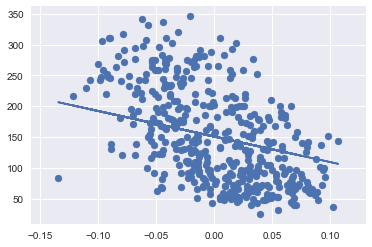

In [197]:
print("ICA")
all(x_FastICA, y, reg_test_ica, reg_pred_ica)

pca


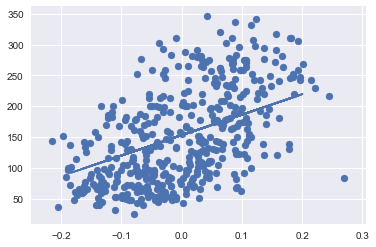

In [198]:
print("pca")
all(x_pca, y, reg_test_pca, reg_pred_pca)

tsne


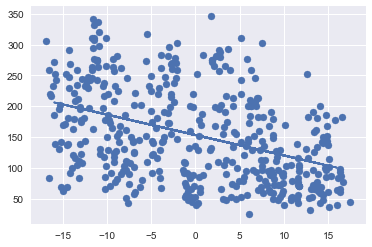

In [199]:
print("tsne")
all(x_tsne, y, reg_test_tsne, reg_pred_tsne)

isomap


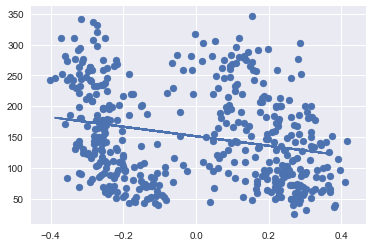

In [200]:
print("isomap")
all(x_isomap, y, reg_test_iso, reg_pred_iso)

#### Lasso

In [277]:
from sklearn.linear_model import Lasso
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20)
reg = Lasso()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_pca = x_test
reg_pred_pca = y_pred
Lasso_test_pca = x_test
Lasso_pred_pca = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_FastICA,y, test_size=0.20)
reg = Lasso()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_ica = x_test
reg_pred_ica = y_pred
Lasso_test_ica = x_test
Lasso_pred_ica = y_pred


x_train, x_test, y_train, y_test = train_test_split(x_isomap, y, test_size=0.20)
reg = Lasso()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_iso = x_test
reg_pred_iso = y_pred
Lasso_test_iso = x_test
Lasso_pred_iso = y_pred



x_train, x_test, y_train, y_test = train_test_split(x_tsne, y, test_size=0.20)
reg = Lasso()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_tsne = x_test
reg_pred_tsne = y_pred
Lasso_test_tsne = x_test
Lasso_pred_tsne = y_pred


ICA


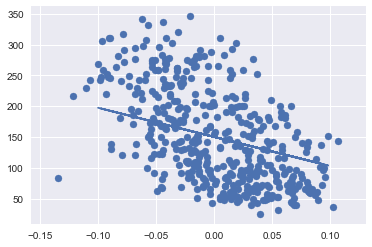

In [203]:
print("ICA")
all(x_FastICA, y, reg_test_ica, reg_pred_ica)

pca


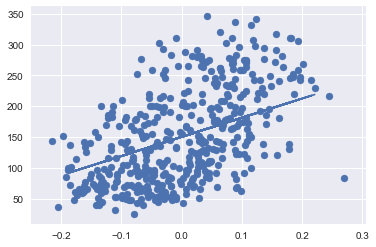

In [204]:
print("pca")
all(x_pca, y, reg_test_pca, reg_pred_pca)

tsne


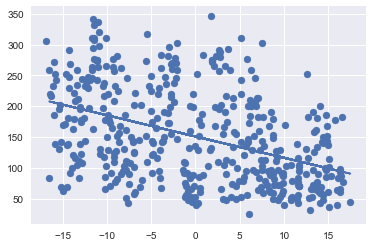

In [205]:
print("tsne")
all(x_tsne, y, reg_test_tsne, reg_pred_tsne)

isomap


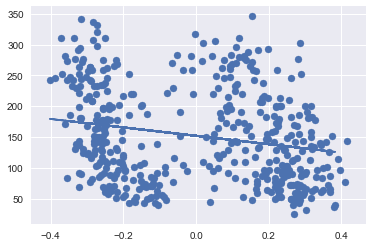

In [206]:
print("isomap")
all(x_isomap, y, reg_test_iso, reg_pred_iso)

#### Lasso LARS

In [241]:
from sklearn.linear_model import LassoLars

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20)
reg = LassoLars()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_pca = x_test
reg_pred_pca = y_pred
LassoLars_test_pca = x_test
LassoLars_pred_pca = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_FastICA,y, test_size=0.20)
reg = LassoLars()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_ica = x_test
reg_pred_ica = y_pred
LassoLars_test_ica = x_test
LassoLars_pred_ica = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_isomap, y, test_size=0.20)
reg = LassoLars()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_iso = x_test
reg_pred_iso = y_pred
LassoLars_test_iso = x_test
LassoLars_pred_iso = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_tsne, y, test_size=0.20)
reg = LassoLars()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_tsne = x_test
reg_pred_tsne = y_pred
LassoLars_test_tsne = x_test
LassoLars_pred_tsne = y_pred

ICA


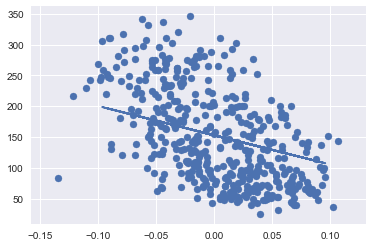

In [208]:
print("ICA")
all(x_FastICA, y, reg_test_ica, reg_pred_ica)

pca


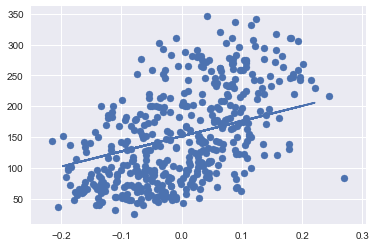

In [209]:
print("pca")
all(x_pca, y, reg_test_pca, reg_pred_pca)

tsne


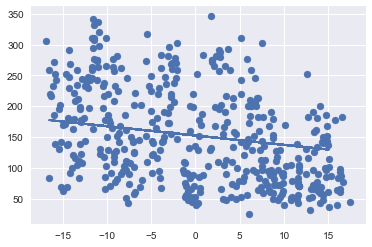

In [210]:
print("tsne")
all(x_tsne, y, reg_test_tsne, reg_pred_tsne)

isomap


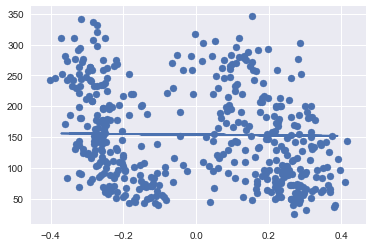

In [211]:
print("isomap")
all(x_isomap, y, reg_test_iso, reg_pred_iso)

#### Bayesian Ridge

In [252]:
from sklearn.linear_model import BayesianRidge
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20)
reg = BayesianRidge()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_pca = x_test
reg_pred_pca = y_pred
bay_test_pca = x_test
bay_pred_pca = y_pred


x_train, x_test, y_train, y_test = train_test_split(x_FastICA,y, test_size=0.20)
reg = BayesianRidge()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_ica = x_test
reg_pred_ica = y_pred
bay_test_ica = x_test
bay_pred_ica = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_isomap, y, test_size=0.20)
reg = BayesianRidge()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_iso = x_test
reg_pred_iso = y_pred
bay_test_iso = x_test
bay_pred_iso = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_tsne, y, test_size=0.20)
reg = BayesianRidge()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_tsne = x_test
reg_pred_tsne = y_pred
bay_test_tsne = x_test
bay_pred_tsne = y_pred

ICA


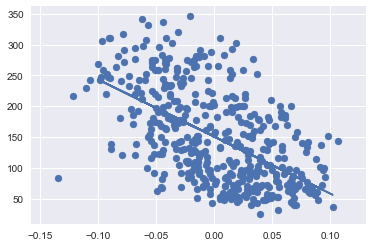

In [213]:
print("ICA")
all(x_FastICA, y, reg_test_ica, reg_pred_ica)

pca


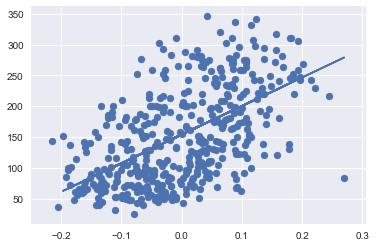

In [214]:
print("pca")
all(x_pca, y, reg_test_pca, reg_pred_pca)

tsne


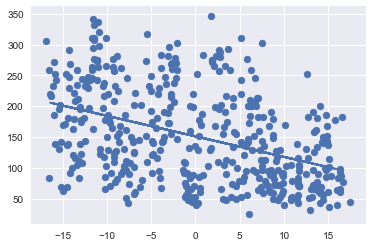

In [215]:
print("tsne")
all(x_tsne, y, reg_test_tsne, reg_pred_tsne)

isomap


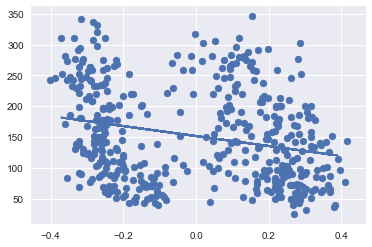

In [216]:
print("isomap")
all(x_isomap, y, reg_test_iso, reg_pred_iso)

#### RANSAC

In [236]:
from sklearn.linear_model import RANSACRegressor
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20)
reg = RANSACRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_pca = x_test
reg_pred_pca = y_pred
Ransac_test_pca = x_test
Ransac_pred_pca = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_FastICA,y, test_size=0.20)
reg = RANSACRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_ica = x_test
reg_pred_ica = y_pred
Ransac_test_ica = x_test
Ransac_pred_ica = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_isomap, y, test_size=0.20)
reg = RANSACRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_iso = x_test
reg_pred_iso = y_pred
Ransac_test_iso = x_test
Ransac_pred_iso = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_tsne, y, test_size=0.20)
reg = RANSACRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_tsne = x_test
reg_pred_tsne = y_pred
Ransac_test_tsne = x_test
Ransac_pred_tsne= y_pred

ICA


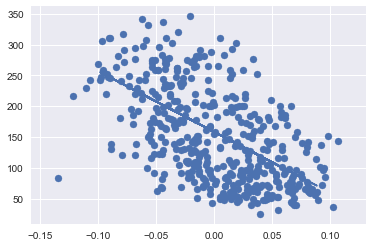

In [222]:
print("ICA")
all(x_FastICA, y, reg_test_ica, reg_pred_ica)

pca


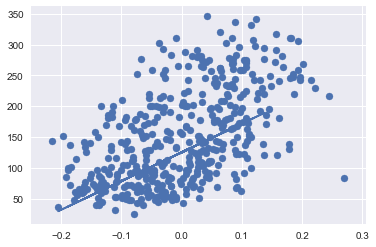

In [223]:
print("pca")
all(x_pca, y, reg_test_pca, reg_pred_pca)

tsne


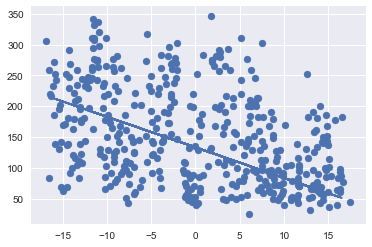

In [224]:
print("tsne")
all(x_tsne, y, reg_test_tsne, reg_pred_tsne)

isomap


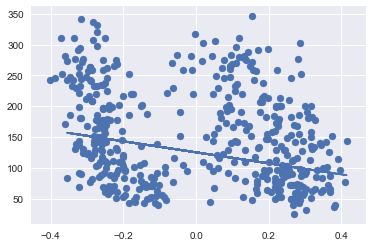

In [225]:
print("isomap")
all(x_isomap, y, reg_test_iso, reg_pred_iso)

#### Theil-Sen

In [245]:
from sklearn.linear_model import TheilSenRegressor
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20)
reg = TheilSenRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_pca = x_test
reg_pred_pca = y_pred
TS_test_pca = x_test
TS_pred_pca = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_FastICA,y, test_size=0.20)
reg = TheilSenRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_ica = x_test
reg_pred_ica = y_pred
TS_test_ica = x_test
TS_pred_ica = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_isomap, y, test_size=0.20)
reg = TheilSenRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_iso = x_test
reg_pred_iso = y_pred
TS_test_iso = x_test
TS_pred_iso = y_pred

x_train, x_test, y_train, y_test = train_test_split(x_tsne, y, test_size=0.20)
reg = TheilSenRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg_test_tsne = x_test
reg_pred_tsne = y_pred
TS_test_tsne = x_test
TS_pred_tsne = y_pred

ICA


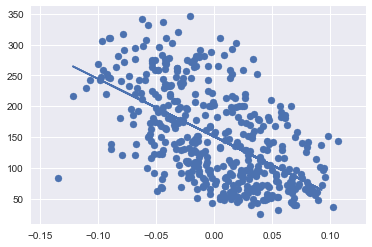

In [227]:
print("ICA")
all(x_FastICA, y, reg_test_ica, reg_pred_ica)

pca


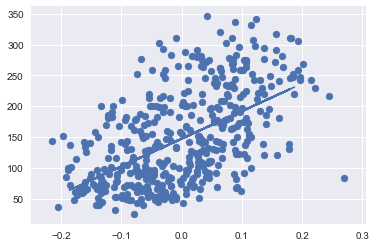

In [228]:
print("pca")
all(x_pca, y, reg_test_pca, reg_pred_pca)

tsne


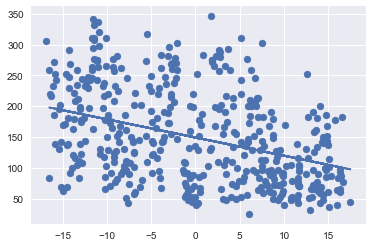

In [229]:
print("tsne")
all(x_tsne, y, reg_test_tsne, reg_pred_tsne)

isomap


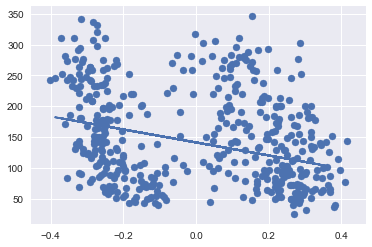

In [230]:
print("isomap")
all(x_isomap, y, reg_test_iso, reg_pred_iso)

### Gráfico geral comparativo

Em uma mesma figura, mostre novamente o gráfico de dispersão dos dados e plote cada um dos modelos gerados utilizando cada técnica deste laboratório. Atente-se a fazer com que o gráfico seja suficientemente autoexplicativo, então utilize diferentes cores, insira uma legenda etc.

PCA


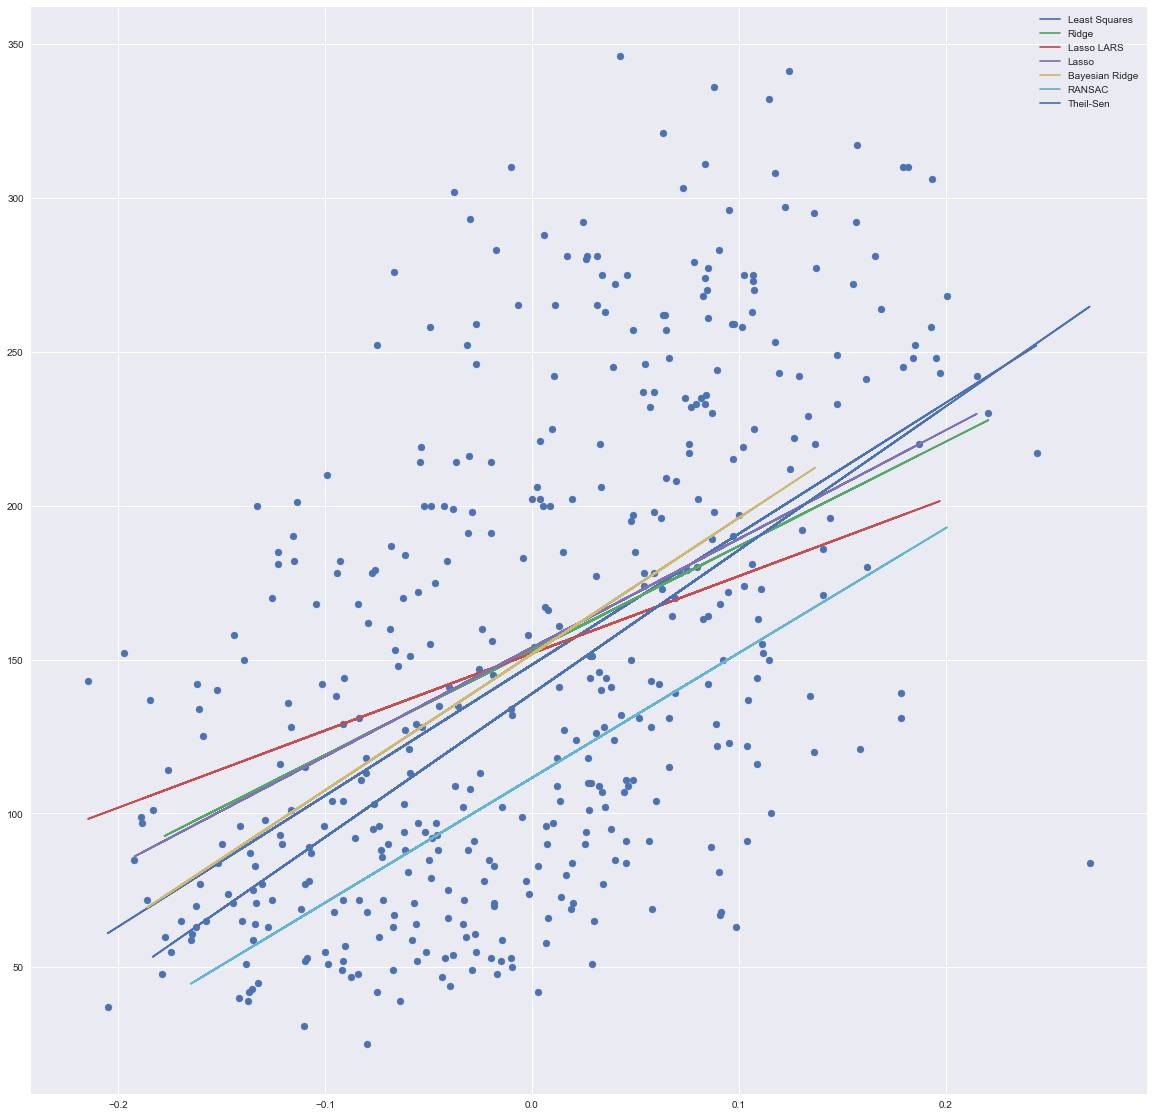

In [264]:
plt.figure(figsize=(20,20))
plt.scatter(x_pca, y)
print("PCA")
plt.plot(LS_test_pca, LS_pred_pca, label="Least Squares")
plt.plot(Ridge_test_pca, Ridge_pred_pca, label="Ridge")
plt.plot(LassoLars_test_pca, LassoLars_pred_pca, label="Lasso LARS")
plt.plot(Lasso_test_pca, Lasso_pred_pca, label="Lasso")
plt.plot(bay_test_pca, bay_pred_pca, label="Bayesian Ridge")
plt.plot(Ransac_test_pca, Ransac_pred_pca, label="RANSAC")
plt.plot(TS_test_pca, TS_pred_pca, label="Theil-Sen")
plt.legend()




ica


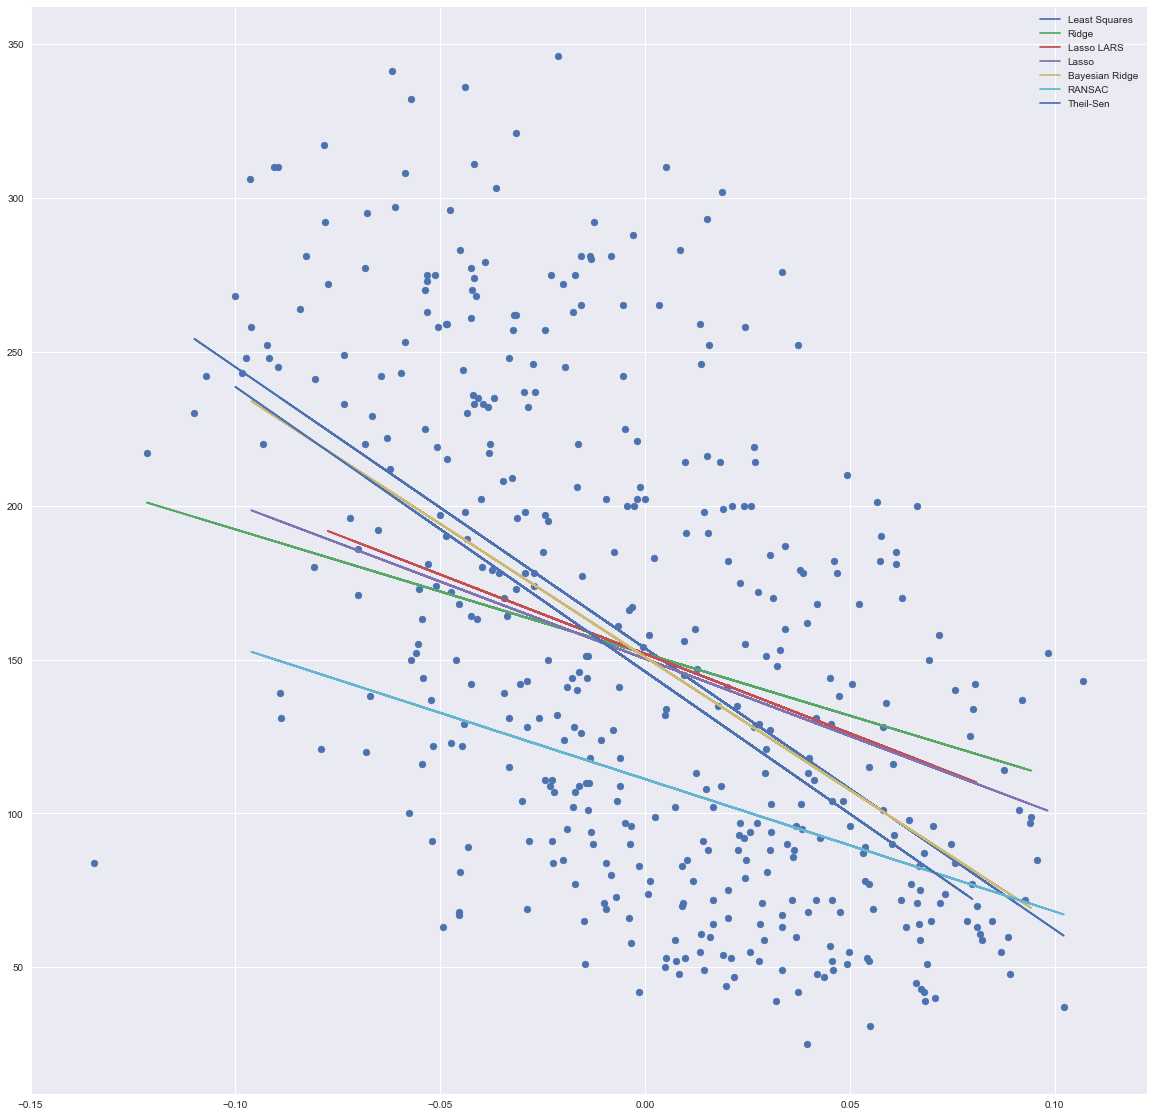

In [269]:
plt.figure(figsize=(20,20))
plt.scatter(x_FastICA, y)
print("ica")
plt.plot(LS_test_ica, LS_pred_ica, label="Least Squares")
plt.plot(Ridge_test_ica, Ridge_pred_ica, label="Ridge")
plt.plot(LassoLars_test_ica, LassoLars_pred_ica, label="Lasso LARS")
plt.plot(Lasso_test_ica, Lasso_pred_ica, label="Lasso")
plt.plot(bay_test_ica, bay_pred_ica, label="Bayesian Ridge")
plt.plot(Ransac_test_ica, Ransac_pred_ica, label="RANSAC")
plt.plot(TS_test_ica, TS_pred_ica, label="Theil-Sen")
plt.legend()

isomap


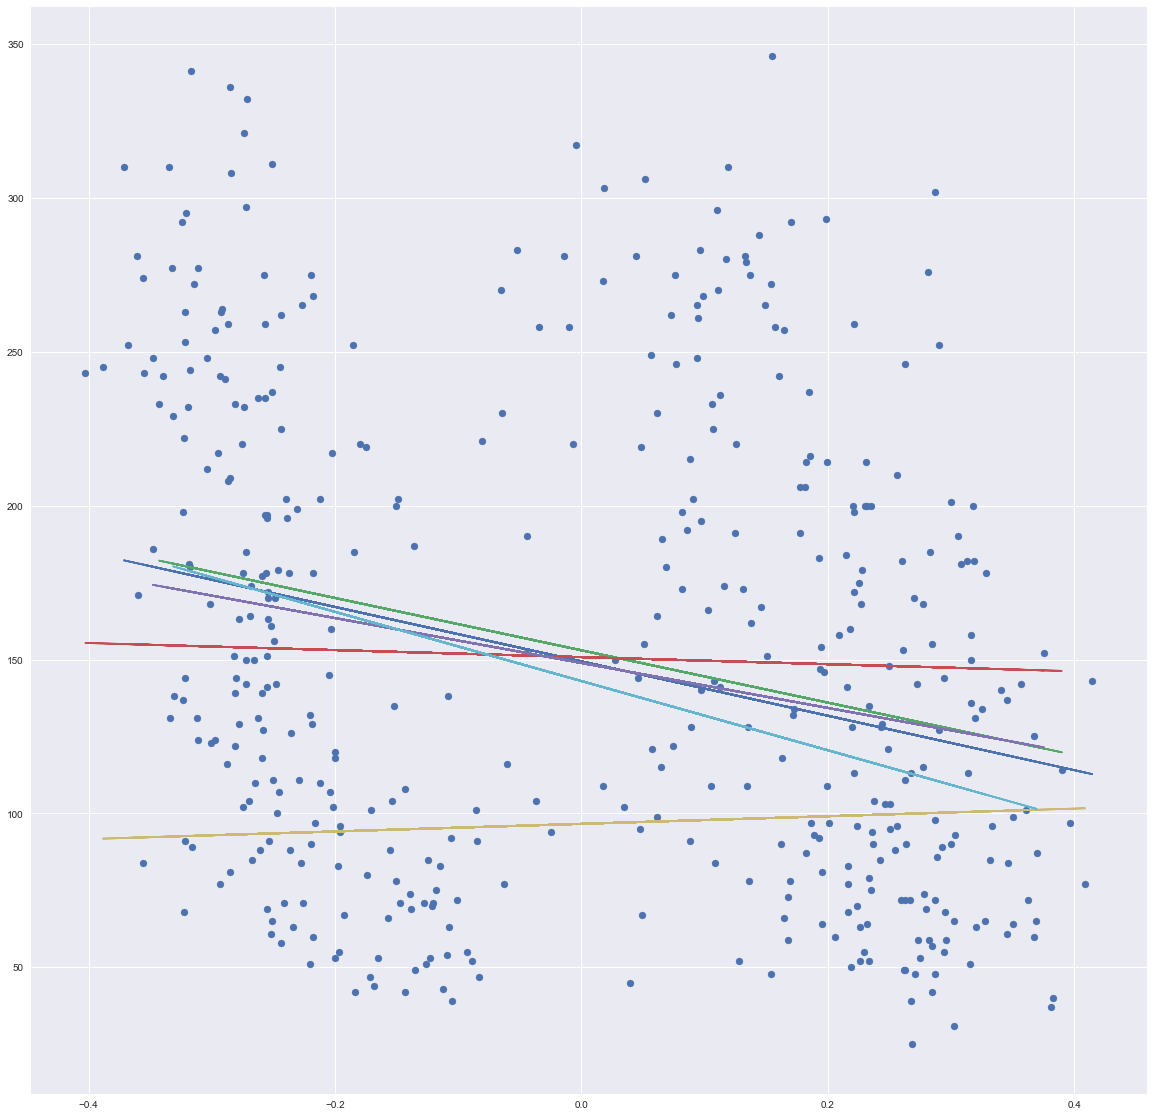

In [275]:
plt.figure(figsize=(20,20))
plt.scatter(x_isomap, y)
print("isomap")
plt.plot(LS_test_iso, LS_pred_iso, label="Least Squares")
plt.plot(Ridge_test_iso, Ridge_pred_iso, label="Ridge")
plt.plot(LassoLars_test_iso, LassoLars_pred_iso, label="Lasso LARS")
#plt.plot(Lasso_test_iso, Lasso_pred_iso, label="Lasso")
plt.plot(bay_test_iso, bay_pred_iso, label="Bayesian Ridge")
plt.plot(Ransac_test_iso, Ransac_pred_iso, label="RANSAC")
plt.plot(TS_test_iso, TS_pred_iso, label="Theil-Sen")


tsne


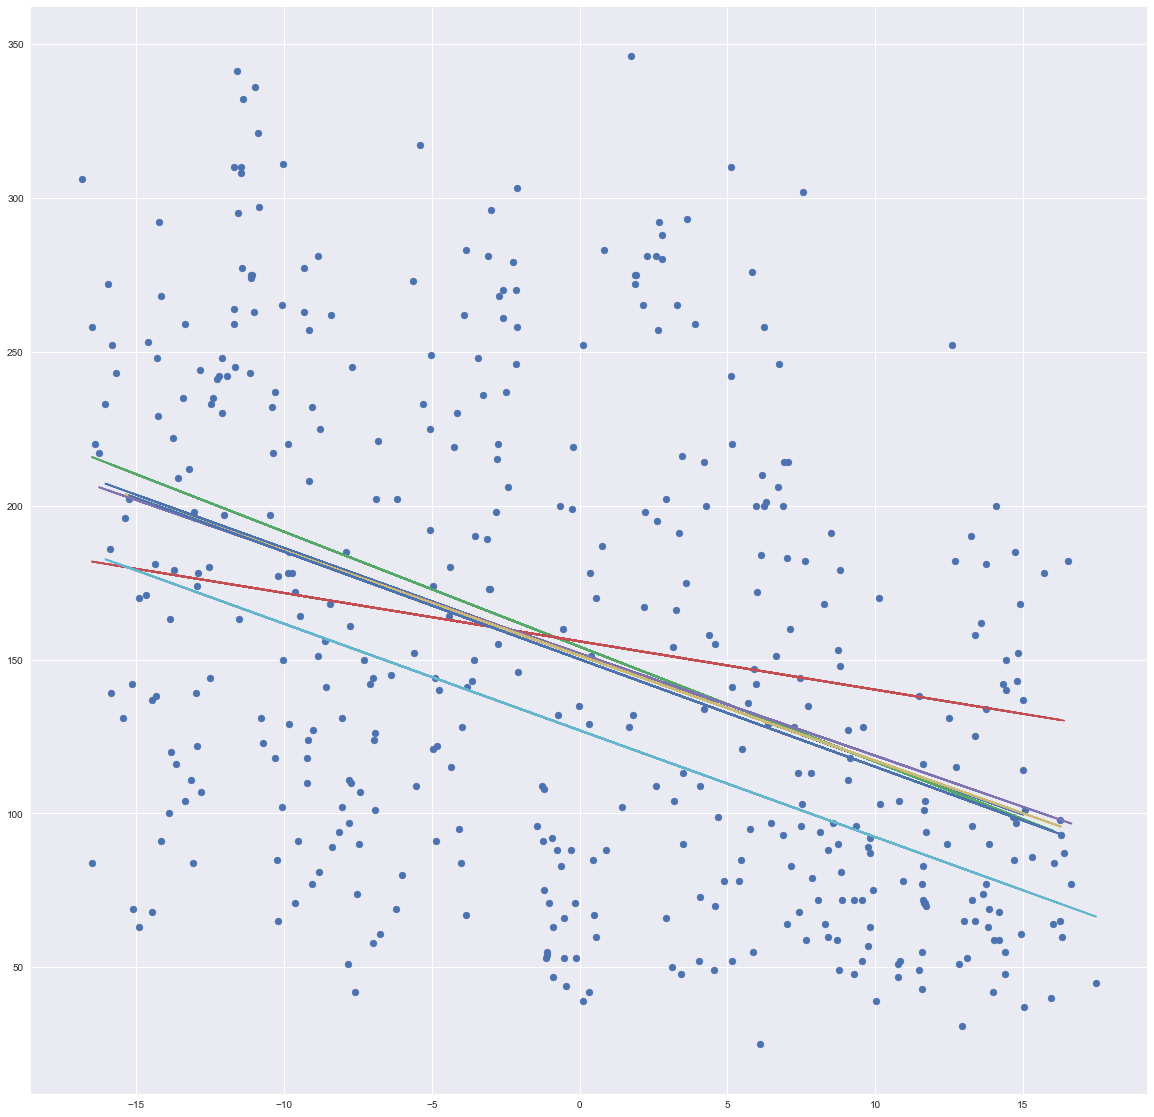

In [278]:
plt.figure(figsize=(20,20))
plt.scatter(x_tsne, y)
print("tsne")
plt.plot(LS_test_tsne, LS_pred_tsne, label="Least Squares")
plt.plot(Ridge_test_tsne, Ridge_pred_tsne, label="Ridge")
plt.plot(LassoLars_test_tsne, LassoLars_pred_tsne, label="Lasso LARS")
plt.plot(Lasso_test_tsne, Lasso_pred_tsne, label="Lasso")
plt.plot(bay_test_tsne, bay_pred_tsne, label="Bayesian Ridge")
plt.plot(Ransac_test_tsne, Ransac_pred_tsne, label="RANSAC")
plt.plot(TS_test_tsne, TS_pred_tsne, label="Theil-Sen")